In [1]:
import numpy as np

from optimize_sequence import optimize_sequence
from abdominal_tools import TargetTissue, AcquisitionBlock, MRFSequence, BLOCKS, create_weightingmatrix, visualize_sequence

In [2]:
prep_modules = ['noPrep', 'TI12', 'TI300', 'T2prep40', 'T2prep80', 'T2prep160']


In [3]:
target_tissue = TargetTissue(661.5, 56.8, 1)

In [4]:
weighting = '1/T1**2, 1/T2**2, 1/M0**2'

In [5]:
weightingmatrix = create_weightingmatrix(target_tissue, weighting)

In [6]:
prep_order_jaubert = ['TI12', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI300', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI12', 'noPrep']

In [7]:
acq_block_fa_jaubert = np.load('/home/tomgr/Documents/code/abdominal/fa_jaubert.npy')

In [8]:
acq_block_tr_jaubert = np.load('/home/tomgr/Documents/code/abdominal/tr_jaubert.npy')

In [9]:
waittimes_jaubert = [1.2e3 - BLOCKS[name]['ti'] - BLOCKS[name]['t2te'] - sum(acq_block_tr_jaubert) for name in prep_order_jaubert]

In [10]:
acq_block = AcquisitionBlock(acq_block_fa_jaubert, acq_block_tr_jaubert, 1.4)

In [11]:
mrf_sequence_jaubert = MRFSequence(prep_order_jaubert, waittimes_jaubert, acq_block)

In [12]:
count, sequences, timestamp, duration = optimize_sequence(target_tissue, acq_block, mrf_sequence_jaubert, prep_modules, weightingmatrix)

In [13]:
mrf_sequence_jaubert.crlb

array([[ 1.15708012e+06, -1.51292791e+04,  1.92868201e+03],
       [-1.51292791e+04,  6.71397063e+02, -5.24139521e+01],
       [ 1.92868201e+03, -5.24139521e+01,  5.13709384e+00]])

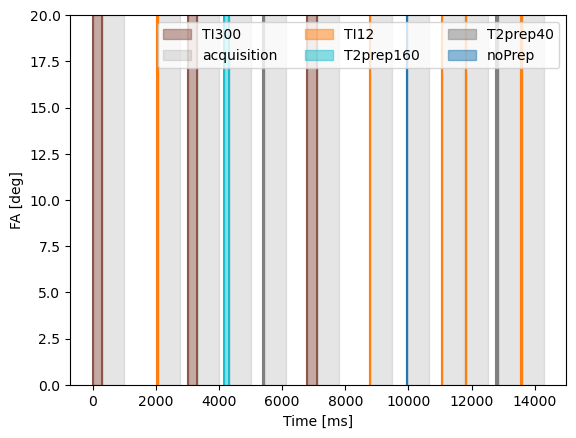

In [14]:
visualize_sequence(sequences[0])

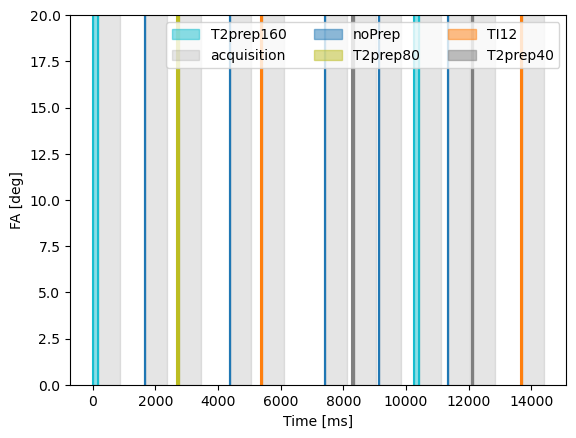

In [15]:
visualize_sequence(sequences[-1])

In [16]:
sequences[-1].crlb

array([[ 3.07959975e+08, -3.16355665e+06,  4.63496872e+05],
       [-3.16355665e+06,  3.26897426e+04, -4.77467279e+03],
       [ 4.63496872e+05, -4.77467279e+03,  6.98811254e+02]])

In [17]:
sequences[0].crlb

array([[ 7.04191783e+05, -6.39305199e+03,  1.03711127e+03],
       [-6.39305199e+03,  2.62098535e+02, -1.69300755e+01],
       [ 1.03711127e+03, -1.69300755e+01,  2.35401762e+00]])